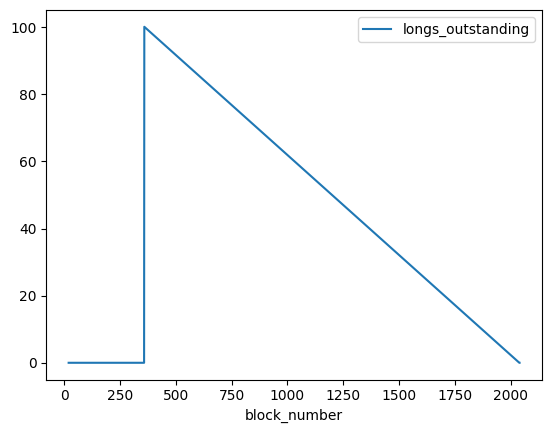

In [1]:
import datetime
from fixedpointmath import FixedPoint
from agent0.hyperdrive.interactive import ILocalChain, ILocalHyperdrive

chain = ILocalChain(ILocalChain.Config())
interactive_hyperdrive = ILocalHyperdrive(chain, ILocalHyperdrive.Config())

agent0 = interactive_hyperdrive.init_agent(base=FixedPoint(100000), eth=FixedPoint(100), name="alice")

chain.advance_time(datetime.timedelta(weeks=1))
open_event = agent0.open_long(base=FixedPoint(100))
chain.advance_time(datetime.timedelta(weeks=5))
close_event = agent0.close_long(open_event.maturity_time, open_event.bond_amount)

pool_state = interactive_hyperdrive.get_pool_state(coerce_float=True)

pool_state.plot(x="block_number", y="longs_outstanding", kind="line");

In [ ]:
dashboard = interactive_hyperdrive.get_dashboard_iframe()
display(dashboard)

In [ ]:
import os, pathlib
from dataclasses import asdict


base_dir = pathlib.Path("/Users/dylan/code/delv/agent0")
venv_dir = pathlib.Path(os.environ["VIRTUAL_ENV"])
streamlit_path = str(venv_dir / "bin" / "streamlit")
dashboard_path = str(base_dir / "lib" / "chainsync" / "bin" / "streamlit" / "Dashboard.py")
dashboard_run_command = [streamlit_path, "run", "--server.headless", "true", dashboard_path]
env = {key: str(val) for key, val in asdict(interactive_hyperdrive.postgres_config).items()}
print(f"{dashboard_path=}")
print(f"{streamlit_path=}")
print(f"{dashboard_run_command=}")

In [ ]:
import subprocess

dashboard_subprocess = subprocess.Popen(
    dashboard_run_command,
    env=env,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
)

In [ ]:
dashboard_subprocess.stdout.peek()

In [ ]:
import streamlit as st
import urllib.parse
session = st.runtime.get_instance()._session_mgr.list_active_sessions()[0]
st_base_url = urllib.parse.urlunparse([session.client.request.protocol, session.client.request.host, "", "", "", ""])

print(st_base_url)

In [ ]:
dashboard_subprocess.stdout.read()

In [ ]:
import re

# Define the regex pattern to match the Network URL
pattern = r"Network URL: (http[s]?:\/\/\S+)"

# Search for the pattern in the text
match = re.search(pattern, str(dashboard_subprocess.stdout.peek()))

# Extract the Network URL if a match is found
if match:
    network_url = match.group(1)
    print("Network URL:", network_url)
else:
   raise ValueError("Unable to find network url.")

In [ ]:
from IPython.display import IFrame
dashboard = IFrame(src=network_url, width=1000, height=800)

In [ ]:
display(dashboard)